# Разведочный анализ данных

Загрузка данных и вывод описательной статистики

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#директория проекта
diraddr = 'C:/Users/leleg/OneDrive/data_science_course/_вкр/project/'

In [3]:
#загрузка исходных данных из xlsx, переименование для краткости названий полей, вывод описательной статистики 
df_bp = pd.read_excel(diraddr + 'data/raw/X_bp.xlsx')
df_nup = pd.read_excel(diraddr + 'data/raw/X_nup.xlsx')
df = pd.merge(left=df_nup, right=df_bp, on ='Unnamed: 0')
df.drop(columns=['Unnamed: 0'],inplace = True)
df.rename(columns={
    'Угол нашивки, град':'UN',
    'Шаг нашивки':'ShN',
    'Плотность нашивки':'PN',
    'Соотношение матрица-наполнитель':'SMN',
    'Плотность, кг/м3':'P',
    'модуль упругости, ГПа':'MU',
    'Количество отвердителя, м.%':'KO',
    'Содержание эпоксидных групп,%_2':'SEG',
    'Температура вспышки, С_2':'TV',
    'Поверхностная плотность, г/м2':'PP',
    'Модуль упругости при растяжении, ГПа':'MUR',
    'Прочность при растяжении, МПа':'PR',
    'Потребление смолы, г/м2':'PS'
}, inplace = True)
df.describe().T

count         mean         std          min          25%          50%  \
UN   1023.0    44.252199   45.015793     0.000000     0.000000     0.000000   
ShN  1023.0     6.899222    2.563467     0.000000     5.080033     6.916144   
PN   1023.0    57.153929   12.350969     0.000000    49.799212    57.341920   
SMN  1023.0     2.930366    0.913222     0.389403     2.317887     2.906878   
P    1023.0  1975.734888   73.729231  1731.764635  1924.155467  1977.621657   
MU   1023.0   739.923233  330.231581     2.436909   500.047452   739.664328   
KO   1023.0   110.570769   28.295911    17.740275    92.443497   110.564840   
SEG  1023.0    22.244390    2.406301    14.254985    20.608034    22.230744   
TV   1023.0   285.882151   40.943260   100.000000   259.066528   285.896812   
PP   1023.0   482.731833  281.314690     0.603740   266.816645   451.864365   
MUR  1023.0    73.328571    3.118983    64.054061    71.245018    73.268805   
PR   1023.0  2466.922843  485.628006  1036.856605  2135.850448  2459.524526   
PS   1023.0   218.423144   59.735931    33.803026   179.627520   219.198882   

             75%          max  
UN     90.000000    90.000000  
ShN     8.586293    14.440522  
PN     64.944961   103.988901  
SMN     3.552660     5.591742  
P    2021.374375  2207.773481  
MU    961.812526  1911.536477  
KO    129.730366   198.953207  
SEG    23.961934    33.000000  
TV    313.002106   413.273418  
PP    693.225017  1399.542362  
MUR    75.356612    82.682051  
PR   2767.193119  3848.436732  
PS    257.481724   414.590628

Вывод диаграмм "ящик с усами"

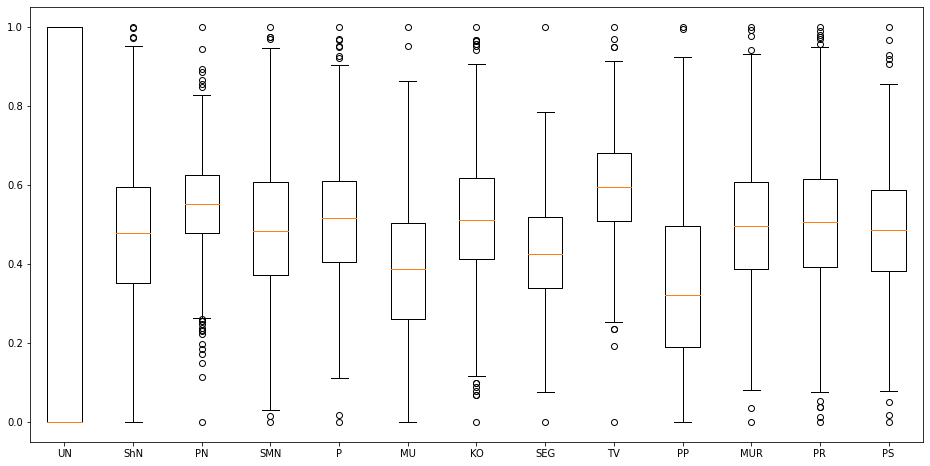

In [4]:
#шкалирование величин в диапазоне [0,1], чтоб ящики были одного масштаба
scaler = MinMaxScaler()
scaler.fit(df)
#вывод ящиков
plt.figure(figsize=(16, 8))
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels = df.columns)
plt.show()

Отбор редких записей с нетипичными параметрами (ящик с усами)

In [5]:
#лист индексов строк со значениями за пределами усов ящика
outliers_ix = []
for col in df.columns:
    lb = df[col].quantile(0.25)-1.5*(df[col].quantile(0.75)-df[col].quantile(0.25))
    ub = df[col].quantile(0.75)+1.5*(df[col].quantile(0.75)-df[col].quantile(0.25))
    cnt = 0
    for i in df.index:
        if df[col].iloc[i] < lb or df[col].iloc[i] > ub:
            cnt += 1
            outliers_ix.append(i)
    print(df[col].name, ':', cnt)
outliers_ix = list(set(outliers_ix))
outliers_ix.sort()
print('-----\nвсего ',len(outliers_ix), 'записей с индексами:', outliers_ix)

UN : 0
ShN : 4
PN : 21
SMN : 6
P : 9
MU : 2
KO : 14
SEG : 2
TV : 8
PP : 2
MUR : 6
PR : 11
PS : 8
-----
всего  87 записей с индексами: [0, 2, 19, 41, 52, 74, 94, 99, 100, 106, 114, 117, 119, 135, 140, 165, 172, 175, 185, 193, 208, 211, 224, 233, 237, 251, 257, 262, 264, 270, 279, 284, 298, 309, 317, 318, 322, 348, 369, 375, 378, 383, 387, 392, 412, 438, 446, 448, 461, 464, 465, 466, 471, 481, 495, 496, 499, 503, 505, 508, 511, 529, 535, 592, 593, 626, 636, 649, 673, 692, 695, 718, 719, 721, 770, 787, 791, 800, 819, 858, 867, 873, 877, 918, 938, 958, 1000]


In [6]:
#датафрейм "выбросов"
df_outliers = df.copy()
for i in df_outliers.index:
    if i not in outliers_ix: 
        df_outliers.drop(index=[i], inplace=True)
df_outliers.describe().T

count         mean         std          min          25%          50%  \
UN    87.0    24.827586   40.458479     0.000000     0.000000     0.000000   
ShN   87.0     6.723184    3.095252     0.000000     4.585108     6.639577   
PN    87.0    53.948231   20.689765     0.000000    45.734036    53.264181   
SMN   87.0     2.980742    1.106416     0.389403     2.223625     2.966839   
P     87.0  1993.969295   98.599624  1731.764635  1931.409675  1985.376327   
MU    87.0   757.950442  347.666351    26.827000   520.751349   749.086041   
KO    87.0   106.854235   39.389268    17.740275    88.858482   108.265862   
SEG   87.0    22.624804    2.508836    14.254985    21.357711    22.625733   
TV    87.0   284.179461   55.137051   100.000000   253.508704   282.366448   
PP    87.0   479.912339  294.810126     4.099043   268.403335   426.917622   
MUR   87.0    73.580803    3.902907    64.054061    71.178735    73.639983   
PR    87.0  2460.833686  680.777468  1036.856605  1986.867449  2529.945213   
PS    87.0   227.135146   77.236938    33.803026   180.672096   220.481828   

             75%          max  
UN     90.000000    90.000000  
ShN     8.496257    14.440522  
PN     68.117999   103.988901  
SMN     3.656216     5.591742  
P    2055.654180  2207.773481  
MU    974.018174  1911.536477  
KO    125.605645   198.953207  
SEG    23.952938    33.000000  
TV    312.548081   413.273418  
PP    677.816056  1399.542362  
MUR    76.156375    82.682051  
PR   2804.499567  3848.436732  
PS    280.875040   414.590628

In [8]:
#датафрейм "без выбросов"
df_no_outliers = df.copy()
for i in df_no_outliers.index:
    if i in outliers_ix: 
        df_no_outliers.drop(index=[i], inplace=True)
df_no_outliers.describe().T

count         mean         std          min          25%          50%  \
UN   936.0    46.057692   45.011619     0.000000     0.000000    90.000000   
ShN  936.0     6.915585    2.509672     0.037639     5.134988     6.943337   
PN   936.0    57.451895   11.239331    27.272928    50.209656    57.584225   
SMN  936.0     2.925683    0.893712     0.547391     2.321931     2.904731   
P    936.0  1974.040023   70.808120  1784.482245  1923.443748  1977.258043   
MU   936.0   738.247627  328.708665     2.436909   498.577158   738.736842   
KO   936.0   110.916216   27.037891    38.668500    92.523816   111.113175   
SEG  936.0    22.209030    2.394871    15.695894    20.571516    22.184713   
TV   936.0   286.040414   39.400677   179.374391   259.184486   286.024118   
PP   936.0   482.993901  280.190377     0.603740   266.004099   457.732246   
MUR  936.0    73.305127    3.037381    65.553336    71.248823    73.259230   
PR   936.0  2467.488822  463.838911  1250.392802  2146.936034  2457.959767   
PS   936.0   217.613374   57.827255    63.685698   179.489091   218.388715   

             75%          max  
UN     90.000000    90.000000  
ShN     8.591450    13.732404  
PN     64.798211    86.012427  
SMN     3.546650     5.314144  
P    2020.158764  2161.565216  
MU    958.418993  1649.415706  
KO    130.001450   181.828448  
SEG    23.961818    28.955094  
TV    312.991425   386.067992  
PP    695.900862  1291.340115  
MUR    75.310788    81.417126  
PR   2755.169485  3705.672523  
PS    256.396777   359.052220

Отбор редких записей с нетипичными параметрами (приавило трех сигм)

In [10]:
#лист индексов строк со значениями за пределами трех сигм от среднего
outliers_ix = []
for col in df.columns:
    lb = df[col].mean()-3*df[col].std()
    ub = df[col].mean()+3*df[col].std()
    cnt = 0
    for i in df.index:
        if df[col].iloc[i] < lb or df[col].iloc[i] > ub:
            cnt += 1
            outliers_ix.append(i)
    print(df[col].name, ':', cnt)
outliers_ix = list(set(outliers_ix))
outliers_ix.sort()
print('-----\nвсего ',len(outliers_ix), 'записей с индексами:', outliers_ix)

UN : 0
ShN : 0
PN : 7
SMN : 0
P : 3
MU : 2
KO : 2
SEG : 2
TV : 3
PP : 2
MUR : 0
PR : 0
PS : 3
-----
всего  23 записей с индексами: [0, 2, 19, 41, 100, 140, 211, 257, 279, 298, 378, 412, 438, 461, 464, 503, 592, 692, 718, 770, 791, 873, 918]


In [11]:
#датафрейм "выбросов"
df_outliers = df.copy()
for i in df_outliers.index:
    if i not in outliers_ix: 
        df_outliers.drop(index=[i], inplace=True)
df_outliers.describe().T

count         mean         std          min          25%          50%  \
UN    23.0    27.391304   42.342477     0.000000     0.000000     0.000000   
ShN   23.0     6.404542    2.817517     0.000000     4.581544     5.721782   
PN    23.0    51.833796   26.158658     0.000000    40.050874    55.226873   
SMN   23.0     2.672397    1.080898     0.463342     1.857143     2.796648   
P     23.0  1990.187517  103.079005  1731.764635  1955.362997  2007.727318   
MU    23.0   794.173097  437.150470    26.827000   521.620928   738.736842   
KO    23.0    99.651837   42.388232    17.740275    76.182726    98.380762   
SEG   23.0    22.628759    3.270069    14.254985    21.881604    22.552746   
TV    23.0   282.614848   66.065887   100.000000   261.986684   286.748810   
PP    23.0   607.775640  396.929296    59.939393   267.029475   586.715020   
MUR   23.0    73.780468    3.378434    66.420794    70.997731    74.659159   
PR    23.0  2556.429121  514.771273  1379.568514  2261.696994  2596.685251   
PS    23.0   225.776734   89.081164    33.803026   178.211827   227.022557   

             75%          max  
UN     90.000000    90.000000  
ShN     8.301920    12.287666  
PN     67.298893   103.988901  
SMN     3.479353     4.484135  
P    2030.000000  2207.773481  
MU    953.854712  1911.536477  
KO    117.026057   198.953207  
SEG    23.563927    33.000000  
TV    306.138196   413.273418  
PP    943.001437  1399.542362  
MUR    76.224187    79.518613  
PR   2932.269567  3583.506884  
PS    263.603678   414.590628

In [12]:
#датафрейм "без выбросов"
df_no_outliers = df.copy()
for i in df_no_outliers.index:
    if i in outliers_ix: 
        df_no_outliers.drop(index=[i], inplace=True)
df_no_outliers.describe().T

count         mean         std          min          25%          50%  \
UN   1000.0    44.640000   45.021076     0.000000     0.000000     0.000000   
ShN  1000.0     6.910600    2.557748     0.037639     5.105814     6.922196   
PN   1000.0    57.276293   11.845791    20.571633    49.892983    57.471971   
SMN  1000.0     2.936299    0.908779     0.389403     2.319283     2.908811   
P    1000.0  1975.402478   72.953703  1784.482245  1923.628661  1977.321002   
MU   1000.0   738.675486  327.545245     2.436909   500.772963   741.148111   
KO   1000.0   110.821904   27.869622    29.956150    92.523816   110.652620   
SEG  1000.0    22.235549    2.384246    15.695894    20.583191    22.221462   
TV   1000.0   285.957299   40.231508   173.484920   259.103839   285.853960   
PP   1000.0   479.855825  277.708571     0.603740   266.978731   450.869535   
MUR  1000.0    73.318178    3.113817    64.054061    71.248823    73.230375   
PR   1000.0  2464.864198  485.015353  1036.856605  2134.535871  2456.394188   
PS   1000.0   218.254011   58.944958    41.048278   179.812213   218.697660   

             75%          max  
UN     90.000000    90.000000  
ShN     8.588839    14.440522  
PN     64.930896    92.963492  
SMN     3.553931     5.591742  
P    2021.159498  2192.738783  
MU    961.650808  1649.415706  
KO    129.853101   192.851702  
SEG    23.974880    28.955094  
TV    313.029126   403.652861  
PP    691.528426  1291.340115  
MUR    75.326573    82.682051  
PR   2760.163022  3848.436732  
PS    257.474775   386.903431

In [13]:
df_no_outliers.to_csv(diraddr + 'data/processed/df_no_outliers.csv')

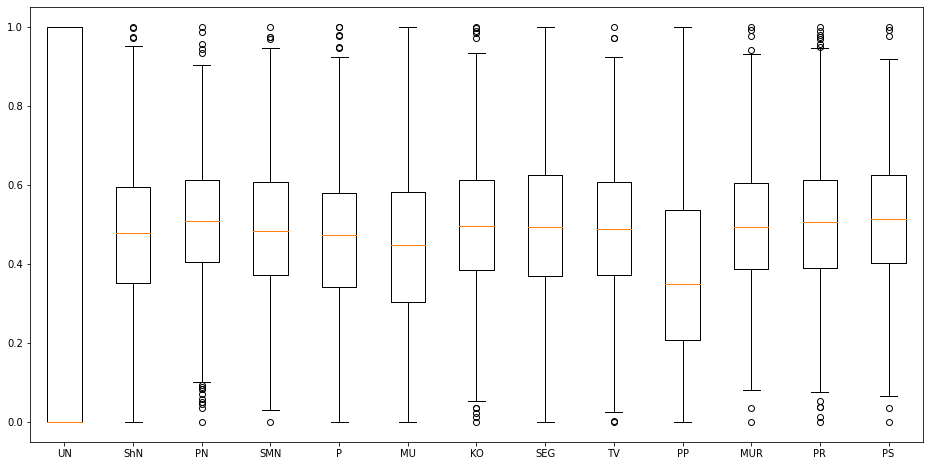

In [14]:
#шкалирование величин в диапазоне [0,1], чтоб ящики были одного масштаба
scaler = MinMaxScaler()
scaler.fit(df_no_outliers)
#вывод ящиков
plt.figure(figsize=(16, 8))
plt.boxplot(pd.DataFrame(scaler.transform(df_no_outliers)), labels = df_no_outliers.columns)
plt.show()

Вывод матрицы корреляции и матрицы попарного рассеяния

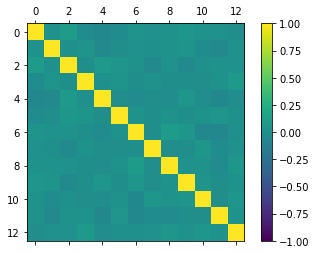

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

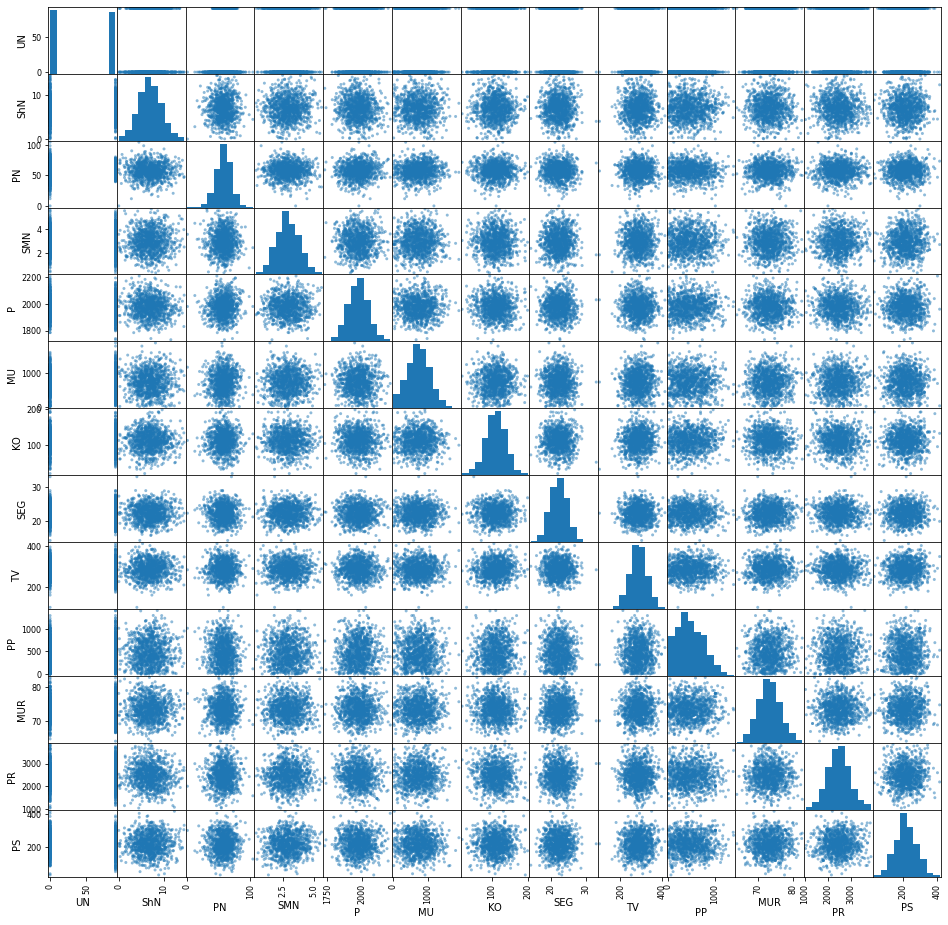

In [16]:
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(16, 16), diagonal='hist')
plt.show()